<a href="https://colab.research.google.com/github/djbell01/563-DawsonBell/blob/main/Problem_Set_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
def return_energy(coordinates):
  energy = 0
  for i in range(len(coordinates['x'])):
    for j in range(len(coordinates['x'])):
      if i >= j:
        continue

      else:
        x_1 = coordinates['x'][i]
        x_2 = coordinates['x'][j]
        y_1 = coordinates['y'][i]
        y_2 = coordinates['y'][j]

        if  ((y_1 == y_2) and (np.abs(x_2 - x_1) == 1)) or ((x_1 == x_2) and (np.abs(y_2 - y_1) == 1)):
          energy -= 1

        else:
          continue

  return energy


def plot_grid(coordinates):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # Calculate the max value for grid boundaries
    max_value = int(np.max([np.max(coordinates['x']), np.max(coordinates['y'])]))

    # Define gridlines that align correctly
    gridlines = np.arange(0, max_value + 2)  # Include 0 to max_value + 1

    # Set major ticks at integer values
    ax.set_xticks(gridlines)
    ax.set_yticks(gridlines)

    # Set minor ticks in between
    minor_ticks = gridlines - 0.5
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(minor_ticks, minor=True)

    # Add grid lines for minor ticks
    ax.grid(which='minor')

    # Turn off tick labels
    ax.tick_params(axis='both', which='both', length=0)

    # Plot the point
    ax.scatter(coordinates['x'], coordinates['y'], 500)

    # Set bounds and aspect ratio
    ax.set_xlim(-0.5, max_value + 0.5)
    ax.set_ylim(-0.5, max_value + 0.5)
    ax.set_aspect('equal', adjustable='box')

    return fig


Energy of Configuration: 0ε


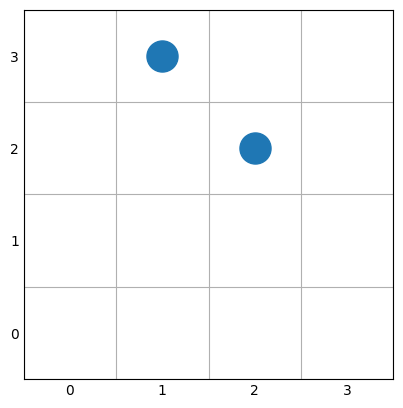

In [48]:
# Figure 2.1 A

dict = {'x' : [1,2],
        'y' : [3,2]}
coords = pd.DataFrame(dict)

print(f'Energy of Configuration: {return_energy(coords)}\N{greek small letter epsilon}')
fig = plot_grid(coords)
plt.show()

Energy of Configuration: -1ε


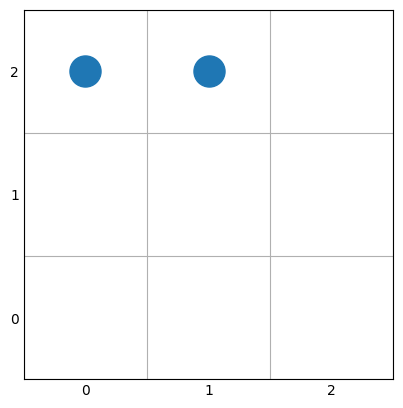

In [49]:
# Figure 2.1 B

dict = {'x' : [0,1],
        'y' : [2,2]}
coords = pd.DataFrame(dict)

print(f'Energy of Configuration: {return_energy(coords)}\N{greek small letter epsilon}')
fig = plot_grid(coords)
plt.show()

Energy of Configuration: 0ε


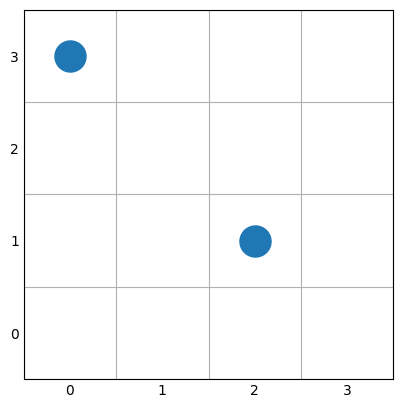

In [50]:
# Figure 2.1 C

dict = {'x' : [0,2],
        'y' : [3,1]}
coords = pd.DataFrame(dict)

print(f'Energy of Configuration: {return_energy(coords)}\N{greek small letter epsilon}')
fig = plot_grid(coords)
plt.show()

Energy of Configuration: -1ε


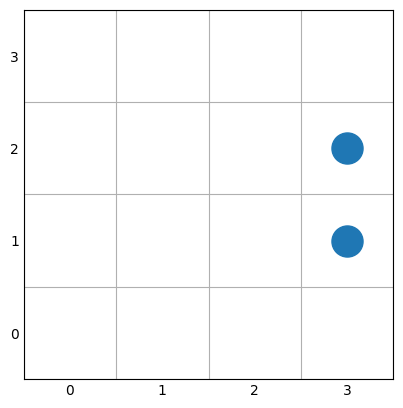

In [51]:
# Figure 2.1 D/E

dict = {'x' : [3,3],
        'y' : [2,1]}
coords = pd.DataFrame(dict)

print(f'Energy of Configuration: {return_energy(coords)}\N{greek small letter epsilon}')
fig = plot_grid(coords)
plt.show()

Energy of Configuration: -4ε


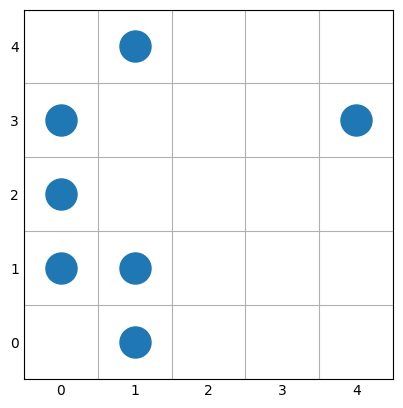

In [53]:
# Demonstrate the code functioning in more complex scenario

n = 10 # max number of points, fewer may be generated because duplicate points must be dropped
max_val = 5 # max number of rows/columns in grid

x = np.random.randint(0,5,size = n)
y = np.random.randint(0,5,size = n)

dict = {'x' : x,
        'y' : y}
coords = pd.DataFrame(dict)
coords = coords.drop_duplicates().reset_index(drop=True)

print(f'Energy of Configuration: {return_energy(coords)}\N{greek small letter epsilon}')
fig = plot_grid(coords)
plt.show()

2.8) Show that the combinations formula for $_{n}C_{k}$ can be expressed as


$$\ln(_{n}C_{k}) = -n\bigg[x\ln(x) + (1-x)\ln(1-x)\bigg]$$

where $x \equiv \frac{k}{n}$. You will need to employ Stirling's approximation.

Stirling's approximation: $n! ≈ (\frac{n}{e})^{n}$

$$_{n}C_{k} = \frac{n!}{k!(n-k)!}$$<br>

$$_{n}C_{k} = \frac{(\frac{n}{e})^{n}}{(\frac{k}{e})^{k}(\frac{n-k}{e})^{n-k}}$$<br>

$$_{n}C_{k} = n^{n}k^{-k}(n-k)^{k-n}e^{-n}e^{k}e^{n-k}$$<br>

$$_{n}C_{k} = n^{n}k^{-k}(n-k)^{k-n}$$<br>

$$\ln(_{n}C_{k}) = \ln(n^{n}k^{-k}(n-k)^{k-n})$$<br>

$$\ln(_{n}C_{k}) = \ln(n^{n}) + \ln(k^{-k}) + \ln((n-k)^{k-n})$$<br>

$$\ln(_{n}C_{k}) = n\ln(n) - k\ln(k) + (k-n)\ln(n-k)$$<br>

$$\ln(_{n}C_{k}) = n\ln(n) - k\ln(k) - (n-k)\ln(n-k)$$<br>

<center>If $x = \frac{k}{n}$, then $k = nx$. This also means that $n-k = n-nx = n(1-x)$.</center><br>

$$\ln(_{n}C_{k}) = n\ln(n) - nx\ln(nx) - n(1-x)\ln(n(1-x))$$<br>

$$\ln(_{n}C_{k}) = -n\bigg[x\ln(nx) + (1-x)\ln(n(1-x)) - \ln(n)\bigg]$$<br>

$$\ln(_{n}C_{k}) = -n\bigg[x\ln(x) + (1-x)\ln(1-x) + x\ln(n) + (1-x)\ln(n) - \ln(n)\bigg]$$<br>

$$\ln(_{n}C_{k}) = -n\bigg[x\ln(x) + (1-x)\ln(1-x) + \ln(n)(x + (1-x) - 1)\bigg]$$<br>

$$\ln(_{n}C_{k}) = -n\bigg[x\ln(x) + (1-x)\ln(1-x)\bigg]$$<br>








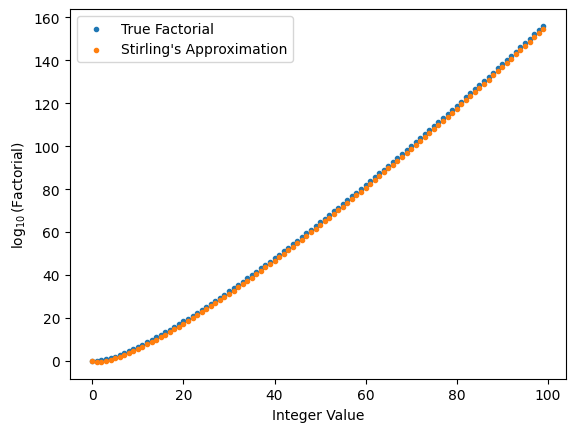

In [54]:
# Demonstrate Stirling's approximation

from scipy.special import factorial

def stirling_approx(n):
  n_fact = (n/np.e)**n
  return n_fact

true_value = []
approx = []

for i in range(100):
  true_value.append(factorial(i))
  approx.append(stirling_approx(i))

true_value = np.log10(true_value)
approx = np.log10(approx)
xvals = np.arange(0,100,1)

plt.scatter(xvals,true_value,label='True Factorial',marker='.')
plt.scatter(xvals,approx,label="Stirling's Approximation",marker='.')
plt.xlabel('Integer Value')
plt.ylabel('$\log_{10}$(Factorial)')
plt.legend()